<a href="https://colab.research.google.com/github/Katinon/Self-Study/blob/main/%ED%98%BC%EC%9E%90-%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%94%A5%EB%9F%AC%EB%8B%9D/17_Dropout%2CCallback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# fit() 메서드는 History 클래스객체 반환
# 손실과 정확도 값이 들어있음
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# 모델을 만드는 함수 정의
def model_fn(a_layer=None) :
  model = keras.Sequential() #sequential 객체
  model.add(keras.layers.Flatten(input_shape=(28,28))) 
  model.add(keras.layers.Dense(100, activation='relu'))
  
  if a_layer :
    model.add(a_layer) #은닉층 뒤에 또하나의 층 추가

  model.add(keras.layers.Dense(10, activation='softmax'))

  return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) #verbose=0 으로 훈련 과정 나타내지 않음

# history객체에는 손실과 정확도가 담겨 있는 history 딕셔너리가 들어있음
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


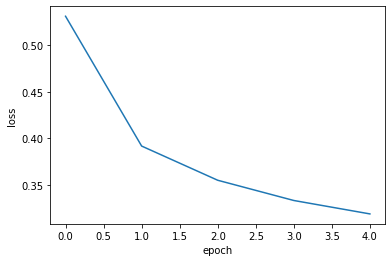

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

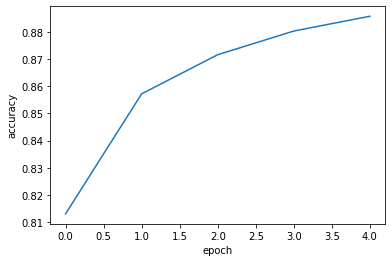

In [6]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

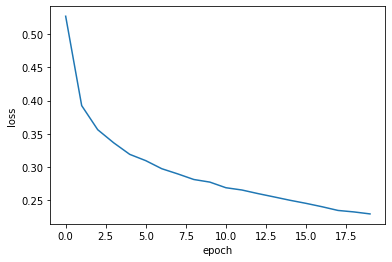

In [7]:
# epochs 20으로 늘려 그래프그리기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [8]:
# 경사 하강법을 사용하기 때문에 에포크에 따른 과대, 과소적합 파악해아함
# fit()의 validation_data 매개변수에 검증세트 튜플로 전달, 검증 손실 계산
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


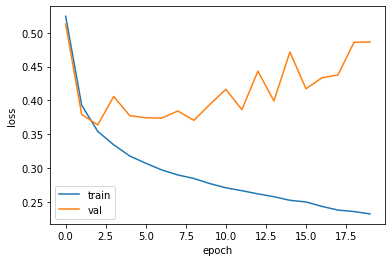

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

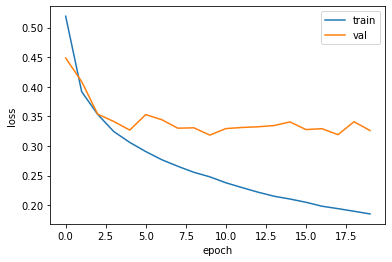

In [10]:
# 6번 정도가 적합?
# 훈련 손실을 꾸준히 감소하기 때문에 과대적합 모델

# Adam은 적응적 학습률을 사용하여 에포크가 진행되면서 학습률 크기를 조절 가능
# optimizer기본값은 RMSprop

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#8번째 epoch까지 감소세가 이어짐, Adam이 이 데이터셋에 잘 맞음을 보여줌
# 더 나은 손실 곡선을 얻으려면 학습률 조정하면 됨

In [11]:
# 드롭아웃 : 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합 막음
# 특정 뉴런에 과대의존하는 것을 줄이고 안정적인 예측 만들음

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


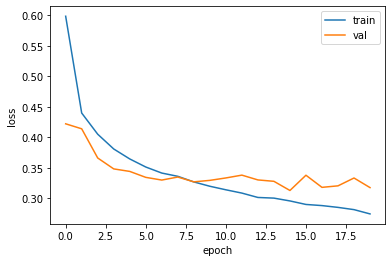

In [12]:
# 평가나 예측을 수행할 땐 드롭아웃 적용하지 말아야 함.
# 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않음

# 드롭아웃 모델
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 10번째 정도에서 검증 손실의 감소가 멈추지만 어느정도 유지됨
# 20번의 epoch 동안 훈련을 했기 때문에 과대적합됨

In [13]:
# epoch 횟수를 10으로 하고 저장
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

#훈련된 모델의 파라미터를 저장
model.save_weights('model-weight.h5')

#모델 구조와 모델 파라미터 같이 저장
model.save('model-whoile.h5')

In [14]:
!ls -la *.h5

-rw-r--r-- 1 root root 333448 Feb 12 14:53 model-weight.h5
-rw-r--r-- 1 root root 982664 Feb 12 14:53 model-whoile.h5


In [18]:
# 저장된 파라미터 불러오기
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weight.h5')

# 예측을 수행하는 predict(), 10개 클래스에 대한 예측 반환
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) #axis=-1 : 마지막 차원, 가장 높은 확률 인덱스 반환
print(np.mean(val_labels == val_target)) # 같으면 1, 다르면 0을 평균화

0.8835


In [22]:
# 저장한 모델 불러와 검증모델 평가
model = keras.models.load_model('model-whoile.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3267 - accuracy: 0.8835


[0.32670801877975464, 0.8834999799728394]

In [23]:
# 지금까지는 적절한 epoch를 확인하고 모델 다시 훈련
# 한번에 끝내기 : 콜백
# ModelCheckpoint 콜백은 최상의 검증 점수를 만드는 모델 저장

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

#파일 이름 지정하여 콜백 적용, 모델 훈련 후 최상의 검증 점수를 낸 모델이 파일에 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

# load_model()로 불러오기
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3270 - accuracy: 0.8885


[0.32703569531440735, 0.8884999752044678]

In [24]:
# 여전히 20번동안 epoch하기 때문에
# 과대적합이 시작되기 전 훈련 미리 중지하는 조기종료
# EarlyStopping 콜백
# patience : 검증점수 향상되지 않더라도 참을 횟수
# restore_best_weights가 True라면 가장 낮은 검증손실을 낸 파라미터로 되돌림

#EarlyStopping을 ModelCheckpoint와 같이 사용하면
# 가장 낮은 검증소신 모델을 파일에 저장하고, 검증 손실이 상승할때 훈련 중지 가능
# 또한 훈련 중지 후 현재 모델의 파라미터를 최상의 파라미터로 되돌림

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

#checkpoint와 earlyStopping 지정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# callbacks에 리스트로 두 콜백 전달
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# 몇번째 epoch에서 훈련 중지되었는지
print(early_stopping_cb.stopped_epoch)

7


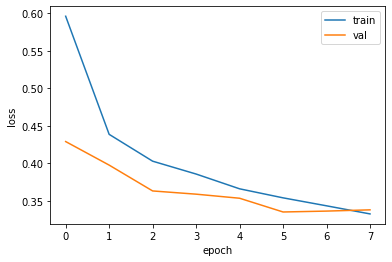

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.8764


[0.33521145582199097, 0.8764166831970215]